# Visual Analyics Lab Project
### By Johannes Lehner, Bogdan Sbiera

##### JKU Linz, Winter Semester 2015-2015, Prof: Marc Streit, Samuel Gratzl
 

## The Data Set

In our project we use the data from the [National Survey on Drug Use and Health, 2012 (ICPSR 34933)](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933?q=&paging.rows=25&sortBy=10) 

The data set contains the answers of the survey. The sample population used for the survey is 55268 people and it contains 3120 variables(some of them are recoded and/or imputed values ). Therefore, the data set contains 55268 rows and 3120 columns. The column names are codes and their meaning can be found in the [codebook](http://www.icpsr.umich.edu/cgi-bin/file?comp=none&study=34933&ds=1&file_id=1198624&path=ICPSR)
The variable CASEID uniquely identifies every entry in the dataset. The people that took this survey are, of course, anonymous, but the data set contains some demographical and social environment data. The data set contains variables about substance abuse and substance dependence, health aspects(substance treatment, pregnancy, mental health, depression), alcohol consumption, income and insurance.

The main reason why we chose this data is probably curiosity. Drugs and drug use are still considered tabu in a lot of countries and we considered this to be a great opportunity to find out more about them from real data(and not from other information sources which are some times used for disinforming/manipulating). 


## Our analysis on the data
### Import
We begin by importing into the notebook the libraries that we'll need for this proejct.

In [31]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

#plots the figures in place instead of a new window
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

### Load the data set
We import the data set(tsv) and set the index column.

In [32]:
#load the data
data = pd.read_csv('data/34933-0001-Data.tsv', sep="\t")
#data = pd.read_csv('data/selection.tsv', sep="\t")
data.index = data.pop("CASEID")
data.shape

(55268, 3119)

### Preparing the data set

In [33]:
# Set IRALCFY to 0 for people who haven't had any drinks in the last 12 months/ever 
data['IRALCFY'].replace({991:0, 993:0}, inplace=True)

# Set IRMJFY to 0 for people who haven't had any MJ in the last 12 months/ever 
data['IRMJFY'].replace({991:0, 993:0}, inplace=True)


## Our visual analysis

We started by trying to find if there is a correlation between frequency(days/year) of smoking MJ ana frequency of Alcohol use.

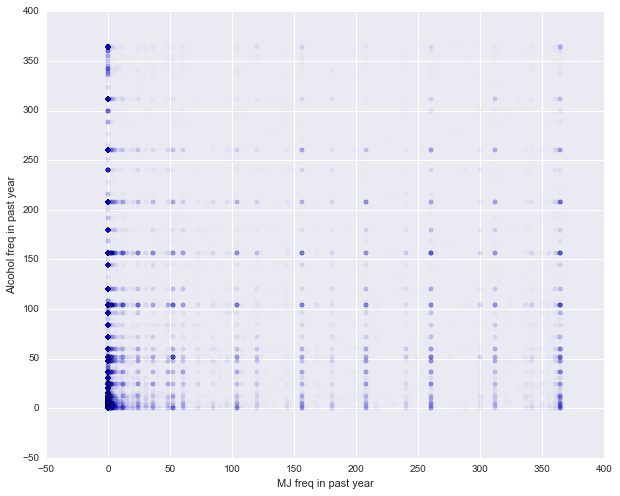

In [34]:
# Frequency(days/year) of Alcohol and MJ use in the past year
plt.figure(figsize=(10, 8))
plt.scatter(y=data['IRALCFY'],x=data['IRMJFY'],alpha=0.01)
plt.ylabel('Alcohol freq in past year')
plt.xlabel("MJ freq in past year")
plt.show()

On a qucik look, one might be tempted to say that people who don't smoke MJ(or smoke really seldom) are heavyer drinkers. In order to check this, we plot a JoinPlot, which is sccatter plot with the distributions of the 2 attributes(as histograms).

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


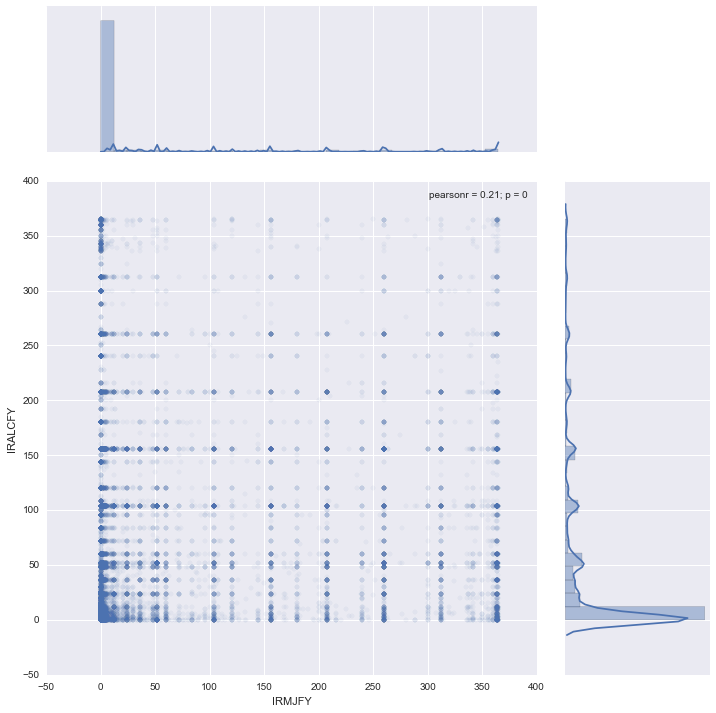

In [35]:
#Frequency(days/year) of Alcohol and MJ use in the past year
sns.set(rc={"figure.figsize": (8, 4)});
sns.jointplot(y='IRALCFY',x='IRMJFY', data=data, 
              alpha=0.05, size=10, ratio=3, 
              marginal_kws={'bins':30,  'kde':True})

We observer that the bins with non MJ smokers and non drinkers dominate the histogram, therefore we cannot observer(almost) nothing from the distribution of the attributes. Therefore we plot the two attributes in another joinplot, but we exclude the persons who don't somke MJ and don't drink alcohol. We also replace the scatterplot with a hexbin plot because it is better for visualizing a bivariate dristribution of a (relatively) large dataset.

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)
C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


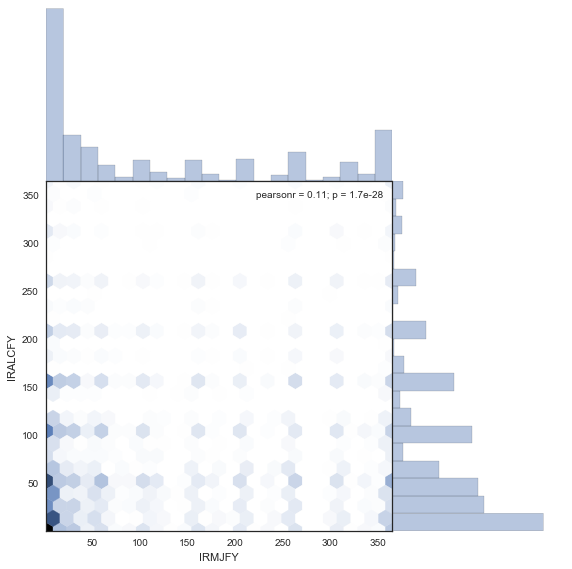

In [36]:
#Frequency(days/year) of Alcohol and MJ use in the past year, 
#excluding those who haven't used alcohool or MJ in the past year/ever
with sns.axes_style("white"):    
    sns.jointplot(y='IRALCFY',x='IRMJFY',data=data[data.IRALCFY>0][data.IRMJFY>0], 
            kind='hex', space=0, size=8, ratio=2, 
            marginal_kws={'bins':20})


The first thing we observer is that the hexbins seem to have a grid pattern, but  this is because the values of the attributes, which are frequency of use over a year, were obtained by asking questions of the form "How many times a week/month you smoke MJ/drink alcohol?"

From this plot we can observer that majority of the population(who drinks alcohol and smokes MJ) are ocasional drinkers(up to 1-3 times a week) and ocasional smokers(up to 1 time a week).

Another interesting observation is the fact that there is a significantly higher number of people who smoke daily than the people who smoke 2 to 6 days a week.

Next we want to compare the distribution of the freuquencies of smoking MJ and drinking alcohol. We used 2 histograms with the same number of bins, overlapped. Because the plots are transparent, we can very easily compare the bisn of each distribution.

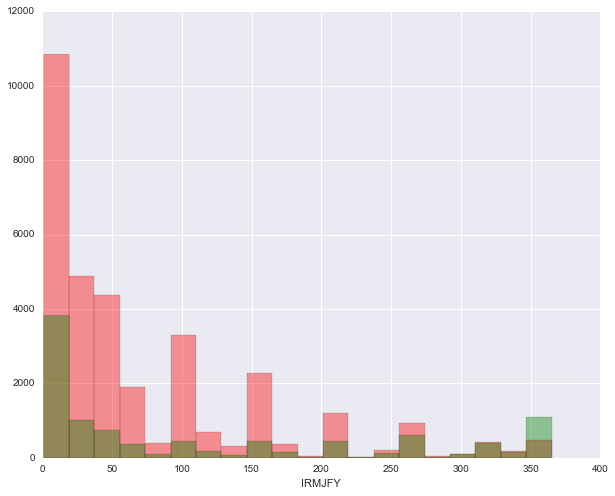

In [37]:
# Dist Plot of the alcohol(red) and MJ(green) frequnecy of use in the past year. 
plt.figure(figsize=(10, 8))
sns.distplot(data[data.IRALCFY>0].IRALCFY,color="red", bins = 20, kde=0)
sns.distplot(data[data.IRMJFY>0].IRMJFY,color='green', bins = 20, kde=0)

We can observer that there are considerably more ocasional(1-4 times a week) drinkers than smokers. We can also observe there are more every day MJ smokers than every day alcohol drinkers.

## Clustering

First step twoards implementing our cluster visualization is importing the needed libraries into the notebook.

In [38]:
#disable some annoying warning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, SpectralClustering
from sklearn import manifold
import matplotlib.patches as mpatches

import ipywidgets
from ipywidgets import interact, interactive, fixed

Next we load the data.

In [39]:
#load the iris datasets
#import sklearn.datasets
#data = sklearn.datasets.load_iris()
#data.data.shape

#load the data
cluster_data = data[["IRALCFY","IRMJFY","IRCOCFY"]][:500]
#data = pd.read_csv('data/34933-0001-Data.tsv', sep="\t")[["IRALCFY","IRMJFY","IRCOCFY"]][:500]
cluster_data.shape

(500, 3)

We define the following function for displaying the cluster plots. This will be used by the overview view of the cluster and also by the detail view.

In [40]:
def display_cluster_plot(param, cluster_algo, data, pos):
    algorithms = {
        "KMeans": KMeans(n_clusters=param, random_state = 102),
        "Spectral": SpectralClustering(n_clusters=param, random_state = 50)
          }
    prediction = algorithms.get(cluster_algo).fit_predict(data)
    
    plt.figure(figsize=(10, 8))
    plt.scatter(pos[:, 0], pos[:, 1], s=20, c=[colors[i] for i in prediction])
    return prediction

Next we prepare for the clustering:
 - we load the color pallete
 - we use MDS as a dimmension reduction technique for reducing the data to 2 dimmensions. This is needed for plotting the data in a scatter plot(2D).

In [41]:
colors = sns.color_palette()

#Dimension reduction using MDS
mds = manifold.MDS(n_components=2, random_state=5)
#fit the model and get the embedded coordinates
pos = mds.fit(cluster_data).embedding_

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### The overview cluster plot
We now create the first interactive plot. We ise @interact annotation for making the plot interactive. The @interact parameters are the parameters used for clustering(i.e. number of clusters, cluster algorithm).

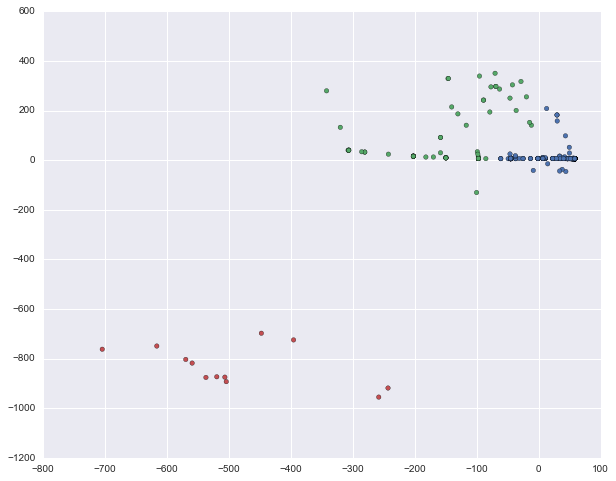

In [42]:
#global state
state ={}

@interact(cluster_count = (1,6), cluster_algo=["KMeans", "Spectral"])
def show_cluster(cluster_count, cluster_algo):
    prediction = display_cluster_plot(cluster_count, cluster_algo, cluster_data, pos)       
    state["clusters"]=prediction
    state["cluster_count"] = cluster_count

### The detail cluster plot
For this, we use the cluster prediction from the overciew plot. We use a slider for selecting the index of the cluster from the overview plot that we want to analyze in more detail. Again we have controls for the 2 clustering parameters: cluster count and cluster algorithm.

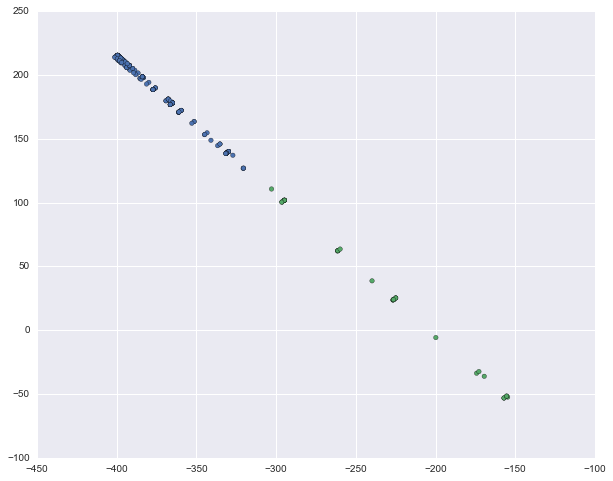

In [30]:
def get_detail_pos(prediction, param):
    detail_pos = []
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_pos.append(pos[i])
    return np.array(detail_pos)

def get_detail_data(prediction, param):
    detail_data = []
    data_as_matrix = cluster_data.as_matrix()
    for i in range(prediction.size):
        if prediction[i] == param:
            detail_data.append(data_as_matrix[i])
    return detail_data

@interact(cluster_idx=(0,state["cluster_count"]-1), cluster_param=ipywidgets.IntText(value=2), cluster_algo=["KMeans", "Spectral"])
def show_detail_cluster(cluster_idx, cluster_param ,cluster_algo):
    prediction = state["clusters"]
    detail_pos = get_detail_pos(prediction, cluster_idx)
    detail_data =  get_detail_data(prediction, cluster_idx)
    display_cluster_plot(cluster_param, cluster_algo, detail_data, detail_pos) 
    